# Task #2: Plot the profile rates per 1M residents

## b) cumulative mortality rate per 1M

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter

In [2]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [3]:
from adjustText import adjust_text

In [4]:
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")
covid_cumulative

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
0,0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...,...
38906,38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


## FILTER THE LAST DAY OF THE RESULTS AND PICK THE TOP N IN # OF CASES

In [5]:
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() 
last_day_per_country = last_day_per_country.to_frame() 
last_day_per_country.reset_index(inplace=True) 

In [6]:
# N: HOW MANY TOP COUNTRIES YOU WANT TO PICK IN TERMS OF # OF CASES
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Deaths', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'Mexico',
 'India',
 'UK',
 'Italy',
 'France',
 'Spain',
 'Peru',
 'Iran',
 'Colombia',
 'Russia',
 'S.Africa',
 'Chile',
 'Belgium',
 'Germany',
 'Canada',
 'Argentina',
 'Indonesia',
 'Iraq']

In [7]:
K = 10    ### day 0 - The day at which cumulative death count exceeded 10
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Deaths'] > K]
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3781,3781,61,12,2020-02-25,Iran,82913893.0,Asia
3848,3848,95,15,2020-02-26,Iran,82913893.0,Asia
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...,...
38854,38854,613378,28124,2020-08-27,Peru,32510462.0,America
38861,38861,970865,16683,2020-08-27,Russia,145872260.0,Europe
38863,38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38897,38897,328846,41465,2020-08-27,UK,66647112.0,Europe


In [8]:
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country

Countries
Argentina   2020-03-27
Belgium     2020-03-15
Brazil      2020-03-21
Canada      2020-03-21
Chile       2020-04-01
Colombia    2020-03-31
France      2020-03-09
Germany     2020-03-16
India       2020-03-26
Indonesia   2020-03-20
Iran        2020-02-25
Iraq        2020-03-18
Italy       2020-02-26
Mexico      2020-03-28
Peru        2020-03-28
Russia      2020-04-01
S.Africa    2020-04-06
Spain       2020-03-10
UK          2020-03-15
USA         2020-03-05
Name: Date, dtype: datetime64[ns]

In [9]:
# MERGE THE TWO TO GET THE DAY_0 IN THE df, AND CALCULATE THE DAYS_FROM_0
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0
0,3781,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0
1,3848,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1
2,3915,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2
3,3982,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3
4,4049,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4
...,...,...,...,...,...,...,...,...,...
3230,38027,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139
3231,38236,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140
3232,38445,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141
3233,38654,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142


In [10]:
covid_top_countries['Deaths_per_1m'] = covid_top_countries['Deaths']/covid_top_countries['Population']*1000000
covid_top_countries.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
covid_top_countries

,Cases,Deaths,Date_x,Countries,Population,Continent,Day_0,Days_from_0,Deaths_per_1m
0,61,12,2020-02-25,Iran,82913893.0,Asia,2020-02-25,0,0.144728
1,95,15,2020-02-26,Iran,82913893.0,Asia,2020-02-25,1,0.180911
2,139,19,2020-02-27,Iran,82913893.0,Asia,2020-02-25,2,0.229153
3,245,26,2020-02-28,Iran,82913893.0,Asia,2020-02-25,3,0.313578
4,388,34,2020-02-29,Iran,82913893.0,Asia,2020-02-25,4,0.410064
...,...,...,...,...,...,...,...,...,...
3230,607045,12987,2020-08-23,S.Africa,58558267.0,Africa,2020-04-06,139,221.779104
3231,609773,13059,2020-08-24,S.Africa,58558267.0,Africa,2020-04-06,140,223.008649
3232,611450,13159,2020-08-25,S.Africa,58558267.0,Africa,2020-04-06,141,224.716350
3233,613017,13308,2020-08-26,S.Africa,58558267.0,Africa,2020-04-06,142,227.260824


In [11]:
covid_top_countries.set_index('Countries', drop=False, inplace=True)
covid_top_countries.index.name = None
max_slope = covid_top_countries.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Deaths_per_1m', ascending=False)
max_slope['Countries'] = max_slope.index
#max_slope

In [12]:
data_1_5 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Cases,Deaths,Date_x,Population,Continent,Day_0,Days_from_0,Deaths_per_1m,Countries
Countries,,,,,,,,,
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-28,152,865.075372,Peru
Belgium,82936,9879,2020-08-27,1.145552e+07,Europe,2020-03-15,165,862.379086,Belgium
UK,328846,41465,2020-08-27,6.664711e+07,Europe,2020-03-15,165,622.157491,UK
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-03-10,169,617.230819,Spain
Italy,262540,35458,2020-08-27,6.035955e+07,Europe,2020-02-26,183,587.446433,Italy
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-04-01,148,579.884957,Chile
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-21,159,557.523185,Brazil
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-03-05,175,546.135400,USA
Mexico,573888,62076,2020-08-27,1.275755e+08,America,2020-03-28,152,486.582344,Mexico


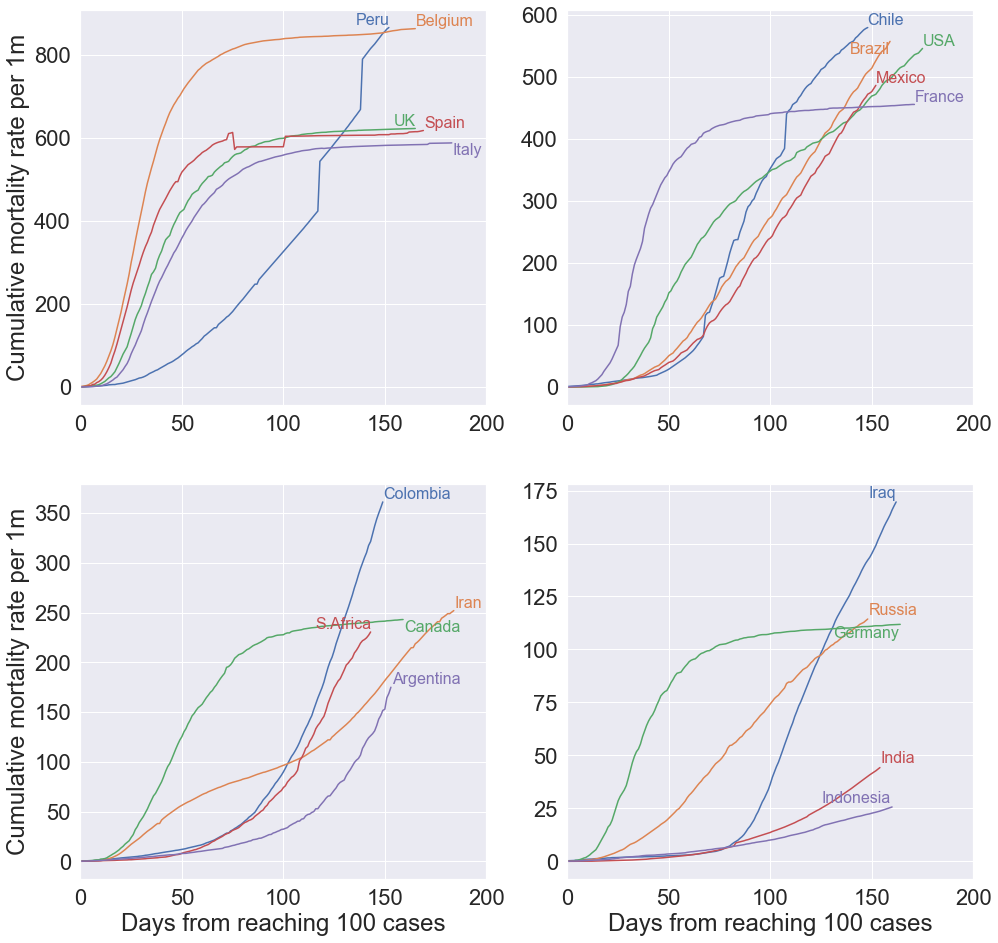

In [13]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Deaths_per_1m", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths_per_1m'], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Cumulative mortality rate per 1m",fontsize=24)

sns.lineplot(x="Days_from_0", y="Deaths_per_1m", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths_per_1m'], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Deaths_per_1m", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths_per_1m'], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Cumulative mortality rate per 1m",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 100 cases",fontsize=24)

sns.lineplot(x="Days_from_0", y="Deaths_per_1m", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Deaths_per_1m'], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 100 cases",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Fig_2_2_Machavolu_Manoj Chandra.png')